### 4.8-1 Imporing libraries and file

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

In [3]:
df_merged_bdays=pd.read_pickle(os.path.join(path,'Prepared Data','ords_merged_bdays.pkl'))

### 4.8-2 finding the aggregated mean of the “order_number” column grouped by “department_id” for the entire dataframe.

In [4]:
df_merged_bdays.shape

(32641279, 18)

In [5]:
df_merged_bdays.groupby('department_id').agg({'order_number':['mean']})

,order_number
,mean
department_id,
1.0,15.457687
2.0,17.277920
3.0,17.179756
4.0,17.811403
5.0,15.215751
6.0,16.439806
7.0,17.225773
8.0,15.340520


#### if the entire df is analysed we became different valuese for the mean as by analyzing the first 1 mln rows. It is normal statistic rule. The difference it self is random because the partial table was sorted by product_id ,whithout any correlation to the department_id .

#### -creating the plot to show the order number by department_id

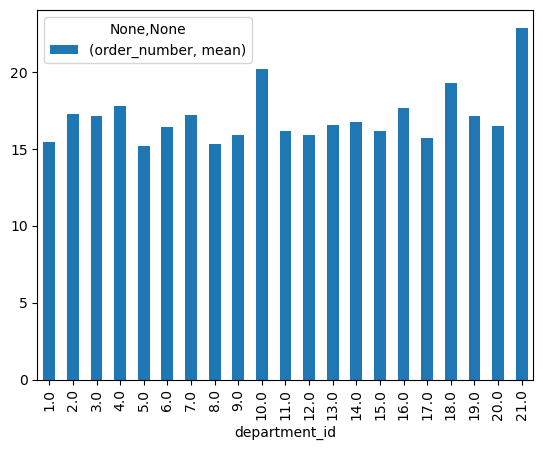

In [6]:
bar=df_merged_bdays.groupby('department_id').agg({'order_number':['mean']}).plot.bar()

#### -esporting bar plot

In [7]:
bar.figure.savefig(os.path.join(path, 'Prepared Data', 'Entire_DepOrdNamber_barplot.png'))

### 4.8-3 creating a loyalty flag for the customers using the transform() and loc() functions

#### creating the column of max order's qnty groupping by customer and transforming number of order in max order number

In [8]:
df_merged_bdays['max_order'] = df_merged_bdays.groupby(['user_id'])['order_number'].transform(np.max)

In [9]:
df_merged_bdays.shape

(32641279, 19)

#### creating loyalty flag according to max order number value

In [10]:
df_merged_bdays.loc[df_merged_bdays['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [11]:
df_merged_bdays.loc[(df_merged_bdays['max_order'] <= 40) & (df_merged_bdays['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [12]:
df_merged_bdays.loc[df_merged_bdays['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [13]:
df_merged_bdays['loyalty_flag'].value_counts(dropna=False)

Regular customer    16381472
Loyal customer      10679578
New customer         5580218
NaN                       11
Name: loyalty_flag, dtype: int64

In [14]:
df_merged_bdays.shape

(32641279, 20)

### 4.8-4 finding a difference between the spending habits of the three types of customers using the loyalty flag for checking the basic statistics of the product prices for each loyalty category (Loyal Customer, Regular Customer, and New Customer).

#### filtring the df for each customer cathegory and creating the df from output, then creating describe statistic for each df

In [15]:
output=df_merged_bdays[df_merged_bdays['loyalty_flag']=='Regular customer']

In [16]:
db2=pd.DataFrame(output)

In [17]:
db2['prices'].describe()

count    1.629661e+07
mean     1.261682e+01
std      5.485322e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
output1=df_merged_bdays[df_merged_bdays['loyalty_flag']=='Loyal customer']

In [19]:
df1=pd.DataFrame(output1)

In [20]:
df1['prices'].describe()

count    1.066106e+07
mean     1.037968e+01
std      3.289191e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.120000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [21]:
output3=df_merged_bdays[df_merged_bdays['loyalty_flag']=='New customer']

In [22]:
df3=pd.DataFrame(output3)

In [23]:
df3['prices'].describe()

count    5.475359e+06
mean     1.320846e+01
std      5.897188e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

##### matching the mean values we can see that the new customers buy the more expensive goods (NC-13.2, LC -10.4, RC- 12.6) and if they continue to buy they find more cheaper option as a Regular customer and finaly they became Loyal customer finding the cheapest option. 

##### matching the 25%, 50% and 75% statistic we became the folow results: (NC-3.2, LC -4.2, RC- 4.2) , (NC-11.4, LC -7.4, RC- 12.6) , (NC-11.3, LC -11.2, RC- 11.3) 

##### thats mean: the behavior of customers buying the expensive item is the same (75% value is like 11.3 by all cathegories). the behavior of customers buying cheap items is more cautious by New Customers (3.2 vs 4.2 by LC andRC).  And most clients are buying more cheap items when they became Loyal Customers (7.4 vs 11.4 and 12.6)

##### analyzing std (price spread by buying) we assume that as more customer is buying as les is the price spread (5.9 vs 5.5 vs 5.3)

### 4.6  Create a spending flag for each user based on the average price across all their orders using the  given criteria

#### Creating column 'mean_price' for each customer

In [24]:
df_merged_bdays['mean_price'] = df_merged_bdays.groupby(['user_id'])['prices'].transform(np.mean)

In [25]:
df_merged_bdays.head(2)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,day_of_week,...,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest days,max_order,loyalty_flag,mean_price
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138.0,prior,28.0,6.0,...,3.0,5.0,0.0,both,mid_range_product,Regularly busy,Regularly days,33.0,Regular customer,6.935811
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138.0,prior,30.0,6.0,...,20.0,1.0,1.0,both,mid_range_product,Regularly busy,Regularly days,33.0,Regular customer,6.935811


#### Creating 'spende_flag'

In [26]:
df_merged_bdays.loc[df_merged_bdays['mean_price']< 10, 'spender_flag'] = 'Low spender'

In [27]:
df_merged_bdays.loc[df_merged_bdays['mean_price']>= 10, 'spender_flag'] = 'High spender'

In [28]:
df_merged_bdays['spender_flag'].value_counts(dropna=False)

Low spender     32000353
High spender      640915
NaN                   11
Name: spender_flag, dtype: int64

#### sorting df by spender_flag

In [29]:
df_merged_bdays.sort_values(['spender_flag'], ascending=False)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,day_of_week,...,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest days,max_order,loyalty_flag,mean_price,spender_flag
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138.0,prior,28.0,6.0,...,5.0,0.0,both,mid_range_product,Regularly busy,Regularly days,33.0,Regular customer,6.935811,Low spender
21655235,33316.0,Lemongrass & Clementine Zest Natural Dish Liquid,74.0,17.0,3.8,256963.0,86434.0,prior,1.0,1.0,...,3.0,0.0,both,low_range_product,Regularly busy,Busiest days,6.0,New customer,7.955405,Low spender
21655233,33316.0,Lemongrass & Clementine Zest Natural Dish Liquid,74.0,17.0,3.8,31256.0,85960.0,prior,5.0,5.0,...,6.0,0.0,both,low_range_product,Regularly busy,Regularly days,7.0,New customer,8.444737,Low spender
21655232,33316.0,Lemongrass & Clementine Zest Natural Dish Liquid,74.0,17.0,3.8,1486406.0,85802.0,prior,6.0,3.0,...,24.0,0.0,both,low_range_product,Regularly busy,Slowest days,12.0,Regular customer,7.101379,Low spender
21655231,33316.0,Lemongrass & Clementine Zest Natural Dish Liquid,74.0,17.0,3.8,2153506.0,85339.0,prior,18.0,1.0,...,5.0,1.0,both,low_range_product,Regularly busy,Busiest days,31.0,Regular customer,9.649778,Low spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24232636,37703.0,Ultra Sun Blossom Liquid 90 loads Fabric Enhan...,75.0,17.0,14.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,left_only,mid_range_product,Regularly busy,Regularly days,NaN,NaN,NaN,NaN
28037267,43725.0,Sweetart Jelly Beans,100.0,21.0,8.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,left_only,mid_range_product,Regularly busy,Regularly days,NaN,NaN,NaN,NaN
29658742,45971.0,12 Inch Taper Candle White,101.0,17.0,9.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,left_only,mid_range_product,Regularly busy,Regularly days,NaN,NaN,NaN,NaN
29930524,46625.0,Single Barrel Kentucky Straight Bourbon Whiskey,31.0,7.0,1.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,left_only,low_range_product,Regularly busy,Regularly days,NaN,NaN,NaN,NaN


### 4.8.6 Creating an frequency flag to determe frequent versus non-frequent customers. (using the median in the “days_since_prior_order” column) with the given criteria

#### Creating 'median_days_sinse_ord' column for each customer

In [30]:
df_merged_bdays['median_days_sinse_ord']=df_merged_bdays.groupby(['user_id'])['days_since_prior_order'].transform (np.median)

#### Assigning the frequent flag (Non-frequent customer: median of “days_since_prior_order” >  20, Regular customer: 10 - 20, Frequent customer: <10)

In [31]:
df_merged_bdays.loc[df_merged_bdays['median_days_sinse_ord']>20,'frequent_flag']='Non-frequent customer'

In [32]:
df_merged_bdays.loc[(df_merged_bdays['median_days_sinse_ord']<=20)&(df_merged_bdays['median_days_sinse_ord']>=10),'frequent_flag']='Regular customer'

In [33]:
df_merged_bdays.loc[df_merged_bdays['median_days_sinse_ord']<10,'frequent_flag']='Frequent customer'

In [34]:
df_merged_bdays['frequent_flag'].value_counts(dropna=False)

Frequent customer        21561982
Regular customer          8326674
Non-frequent customer     2752612
NaN                            11
Name: frequent_flag, dtype: int64

#### the NANs are new castomers that have done the first order only

#### Checking df:

In [35]:
df_merged_bdays.shape

(32641279, 24)

In [36]:
df_merged_bdays

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,day_of_week,...,_merge,price_range_loc,busiest_day,busiest days,max_order,loyalty_flag,mean_price,spender_flag,median_days_sinse_ord,frequent_flag
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138.0,prior,28.0,6.0,...,both,mid_range_product,Regularly busy,Regularly days,33.0,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138.0,prior,30.0,6.0,...,both,mid_range_product,Regularly busy,Regularly days,33.0,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,389851.0,709.0,prior,2.0,0.0,...,both,mid_range_product,Busiest day,Busiest days,6.0,New customer,7.930208,Low spender,6.0,Frequent customer
3,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,652770.0,764.0,prior,1.0,3.0,...,both,mid_range_product,Regularly busy,Slowest days,4.0,New customer,4.972414,Low spender,9.0,Frequent customer
4,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1813452.0,764.0,prior,3.0,4.0,...,both,mid_range_product,Least busy,Slowest days,4.0,New customer,4.972414,Low spender,9.0,Frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32641274,26519.0,NaN,NaN,NaN,NaN,1405103.0,194090.0,prior,21.0,1.0,...,right_only,NaN,Regularly busy,Busiest days,45.0,Loyal customer,8.594718,Low spender,8.0,Frequent customer
32641275,26519.0,NaN,NaN,NaN,NaN,635307.0,194090.0,prior,35.0,2.0,...,right_only,NaN,Regularly busy,Regularly days,45.0,Loyal customer,8.594718,Low spender,8.0,Frequent customer
32641276,26519.0,NaN,NaN,NaN,NaN,1940566.0,194090.0,prior,40.0,4.0,...,right_only,NaN,Least busy,Slowest days,45.0,Loyal customer,8.594718,Low spender,8.0,Frequent customer
32641277,26519.0,NaN,NaN,NaN,NaN,550657.0,198251.0,prior,63.0,1.0,...,right_only,NaN,Regularly busy,Busiest days,69.0,Loyal customer,7.229468,Low spender,5.0,Frequent customer


In [37]:
df_merged_bdays.to_pickle(os.path.join(path,'Prepared Data', 'merged_bdays_flags.pkl'))

In [38]:
df_merged_bdays.shape

(32641279, 24)